In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib as mpl

/public/apps/python/3.7.0/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
bull_rg=pd.read_csv("bull_Rg_master_out.csv")
bull_ree=pd.read_csv("bull_Ree_master_out.csv")
bull_rg_ree=pd.concat([bull_rg,bull_ree.iloc[:,2:]],axis=1)
bull_rg_ree['ratio']=bull_rg_ree.Ree.values**2/bull_rg_ree.Rg.values**2
del bull_rg, bull_ree

In [3]:
salmon_rg = pd.read_csv("salmon_rg.csv").iloc[:,:3]
p1_rg = pd.read_csv("p1_rg.csv")
bull_secstruc = pd.read_csv("bull_master_secstruct.csv")
salmon_secstruc=pd.read_csv("salmon_secstruct.csv")
p1_secstruc=pd.read_csv("p1_secstruct.csv")

In [4]:
frame_counts=bull_secstruc.groupby('sim').Frames.max()
for simm in frame_counts.index:
    secstruc_bool=(bull_secstruc.sim==simm) & (bull_secstruc.Frames==frame_counts[simm]) 
    bull_secstruc=bull_secstruc[~secstruc_bool]
temp_secstruc=bull_secstruc.Secstruct.values
temp_secstruc=temp_secstruc.reshape((int(temp_secstruc.shape[0]/int(bull_secstruc.Residues.max()))),int(bull_secstruc.Residues.max()))
temp_secstruc=pd.DataFrame(data=temp_secstruc,columns=bull_secstruc.Residues.unique())
bull_secstruc=pd.concat([bull_rg_ree.iloc[:,:2],temp_secstruc],axis=1)
del temp_secstruc
frame_counts=p1_secstruc.groupby('sim').Frames.max()
for simm in frame_counts.index:
    secstruc_bool=(p1_secstruc.sim==simm) & (p1_secstruc.Frames==frame_counts[simm]) 
    p1_secstruc=p1_secstruc[~secstruc_bool]
temp_secstruc=p1_secstruc.Secstruct.values
temp_secstruc=temp_secstruc.reshape((int(temp_secstruc.shape[0]/int(p1_secstruc.Residues.max()))),int(p1_secstruc.Residues.max()))
temp_secstruc=pd.DataFrame(data=temp_secstruc,columns=p1_secstruc.Residues.unique())
p1_secstruc=pd.concat([p1_rg.iloc[:,:2],temp_secstruc],axis=1)
del temp_secstruc
frame_counts=salmon_secstruc.groupby('sim').Frames.max()
for simm in frame_counts.index:
    secstruc_bool=(salmon_secstruc.sim==simm) & (salmon_secstruc.Frames==frame_counts[simm]) 
    salmon_secstruc=salmon_secstruc[~secstruc_bool]
temp_secstruc=salmon_secstruc.Secstruct.values
temp_secstruc=temp_secstruc.reshape((int(temp_secstruc.shape[0]/int(salmon_secstruc.Residues.max()))),int(salmon_secstruc.Residues.max()))
temp_secstruc=pd.DataFrame(data=temp_secstruc,columns=salmon_secstruc.Residues.unique())
salmon_secstruc=pd.concat([salmon_rg.iloc[:,:2],temp_secstruc],axis=1)
del temp_secstruc

In [5]:
salmon_rg=salmon_rg[salmon_rg.sim!=2]
salmon_rg=salmon_rg[salmon_rg.sim!=11]
p1_rg=p1_rg[p1_rg.sim!=13]
p1_rg=p1_rg[p1_rg.sim!=15]
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=14]
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=15]
salmon_secstruc=salmon_secstruc[salmon_secstruc.sim!=2]
salmon_secstruc=salmon_secstruc[salmon_secstruc.sim!=11]
p1_secstruc=p1_secstruc[p1_secstruc.sim!=13]
p1_secstruc=p1_secstruc[p1_secstruc.sim!=15]
bull_secstruc=bull_secstruc[bull_secstruc.sim!=14]
bull_secstruc=bull_secstruc[bull_secstruc.sim!=15]

In [6]:
#below steps only for salmon. salmon has few extra frames in some simulations
temp_df=salmon_secstruc.copy()
for sim in temp_df.sim.unique():
    n=temp_df[temp_df.sim==sim].frames.max()-100000
    if n>0:
        temp_df.drop(temp_df[temp_df.sim==sim].tail(n).index,inplace=True)
salmon_secstruc=temp_df.copy()
del temp_df
temp_df=salmon_rg.copy()
for sim in temp_df.sim.unique():
    n=temp_df[temp_df.sim==sim].frames.max()-100000
    if n>0:
        temp_df.drop(temp_df[temp_df.sim==sim].tail(n).index,inplace=True)
salmon_rg=temp_df.copy()
del temp_df

In [7]:
blank_df = pd.DataFrame()
for sim in bull_rg_ree.sim.unique():
    temp_df = bull_rg_ree[bull_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
bull_rg_ree = blank_df.copy()
del blank_df
del temp_df
blank_df = pd.DataFrame()
for sim in salmon_rg.sim.unique():
    temp_df = salmon_rg[salmon_rg.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
salmon_rg = blank_df.copy()
del blank_df, temp_df
blank_df = pd.DataFrame()
for sim in p1_rg.sim.unique():
    temp_df = p1_rg[p1_rg.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_rg = blank_df.copy()
del blank_df, temp_df
blank_df = pd.DataFrame()
for sim in bull_secstruc.sim.unique():
    temp_df = bull_secstruc[bull_secstruc.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
bull_secstruc = blank_df.copy()
del blank_df, temp_df
blank_df = pd.DataFrame()
for sim in salmon_secstruc.sim.unique():
    temp_df = salmon_secstruc[salmon_secstruc.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
salmon_secstruc = blank_df.copy()
del blank_df, temp_df
blank_df = pd.DataFrame()
for sim in p1_secstruc.sim.unique():
    temp_df = p1_secstruc[p1_secstruc.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_secstruc = blank_df.copy()
del blank_df, temp_df

In [8]:
def calculate_helicity(df_secstruc):
    temp_secstruc=df_secstruc.iloc[:,2:]
    helix_tot=temp_secstruc.shape[1]
    temp_3_10=temp_secstruc.eq(3).sum(axis=1)
    temp_alpha=temp_secstruc.eq(4).sum(axis=1)
    temp_pi=temp_secstruc.eq(5).sum(axis=1)
    helic_frac=(temp_3_10+temp_alpha+temp_pi)/helix_tot
    return helic_frac
def calculate_helicity_byres(df_secstruc):
    temp_secstruc=df_secstruc.iloc[:,2:]
    helix_tot=temp_secstruc.shape[0]
    temp_3_10=temp_secstruc.eq(3).sum(axis=0)
    temp_alpha=temp_secstruc.eq(4).sum(axis=0)
    temp_pi=temp_secstruc.eq(5).sum(axis=0)
    helic_frac_byres=(temp_3_10+temp_alpha+temp_pi)/helix_tot
    return helic_frac_byres
def calculate_coil_byres(df_secstruc):
    temp_secstruc=df_secstruc.iloc[:,2:]
    coil_tot=temp_secstruc.shape[0]
    turn=temp_secstruc.eq(6).sum(axis=0)
    bend=temp_secstruc.eq(7).sum(axis=0)
    none=temp_secstruc.eq(0).sum(axis=0)
    coil_frac_byres=(turn+bend+none)/coil_tot
    return coil_frac_byres
def calculate_sheet_byres(df_secstruc):
    temp_secstruc=df_secstruc.iloc[:,2:]
    sheet_tot=temp_secstruc.shape[0]
    parallel=temp_secstruc.eq(1).sum(axis=0)
    anti_parallel=temp_secstruc.eq(2).sum(axis=0)
    sheet_frac_byres=(parallel+anti_parallel)/sheet_tot
    return sheet_frac_byres
def ss_propensity(df_secstruc):
    temp_secstruc=df_secstruc.iloc[:,2:]
    ss_tot=temp_secstruc.shape[1]
    ss=temp_secstruc.ne(0).sum(axis=1)
    ss_frac=ss/ss_tot
    return ss_frac
def ss_propensity_byres(df_secstruc):
    temp_secstruc=df_secstruc.iloc[:,2:]
    ss_tot=temp_secstruc.shape[0]
    ss=temp_secstruc.ne(0).sum(axis=0)
    ss_frac=ss/ss_tot
    return ss_frac

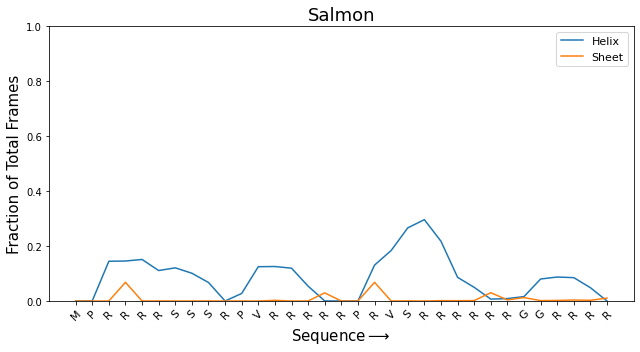

In [9]:
plt.subplots(figsize=(9,5))
plt.plot(calculate_helicity_byres(salmon_secstruc),label='Helix')
#plt.plot(calculate_coil_byres(salmon_secstruc),label='Coil (Includes "None" )')
plt.plot(calculate_sheet_byres(salmon_secstruc),label='Sheet')
plt.title('Salmon',fontsize=18)
salmon_sequence='MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'
plt.ylim(0,1)
plt.xlabel('Sequence'+ r'$\longrightarrow$',fontsize=15)
plt.ylabel('Fraction of Total Frames',fontsize=15)
plt.xticks(ticks=np.arange(1,len(salmon_sequence)+1),
                           labels=salmon_sequence,rotation=45,fontsize=11)

plt.legend(fontsize=11)
plt.tight_layout()


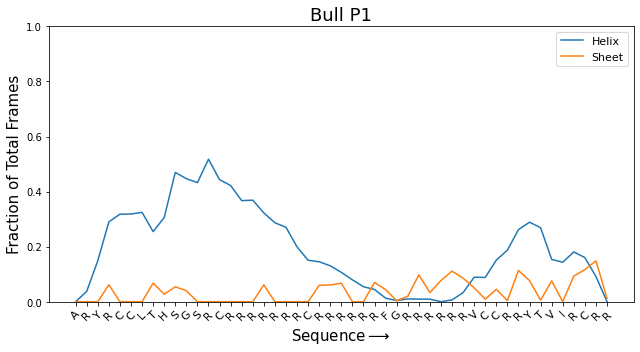

In [10]:
plt.subplots(figsize=(9,5))
plt.plot(calculate_helicity_byres(bull_secstruc),label='Helix')
#plt.plot(calculate_coil_byres(bull_secstruc),label='Coil (Includes "None" )')
plt.plot(calculate_sheet_byres(bull_secstruc),label='Sheet')
plt.title('Bull P1',fontsize=18)
bull_sequence='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
plt.ylim(0,1)
plt.xlabel('Sequence'+ r'$\longrightarrow$',fontsize=15)
plt.ylabel('Fraction of Total Frames',fontsize=15)
plt.xticks(ticks=np.arange(1,len(bull_sequence)+1),
                           labels=bull_sequence,rotation=45,fontsize=11)

plt.legend(fontsize=11)
plt.tight_layout()


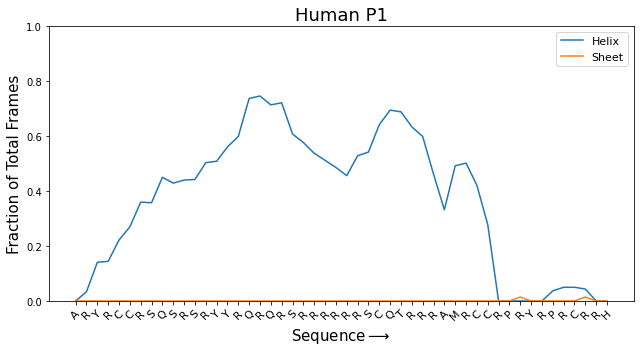

In [11]:
plt.subplots(figsize=(9,5))
plt.plot(calculate_helicity_byres(p1_secstruc),label='Helix')
#plt.plot(calculate_coil_byres(p1_secstruc),label='Coil (Includes "None" )')
plt.plot(calculate_sheet_byres(p1_secstruc),label='Sheet')
plt.title('Human P1',fontsize=18)
p1_sequence='ARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH'
plt.ylim(0,1)
plt.xlabel('Sequence'+ r'$\longrightarrow$',fontsize=15)
plt.ylabel('Fraction of Total Frames',fontsize=15)
plt.xticks(ticks=np.arange(1,len(p1_sequence)+1),
                           labels=p1_sequence,rotation=45,fontsize=11)

plt.legend(fontsize=11)
plt.tight_layout()


In [12]:
bull_byframebyres=bull_secstruc.iloc[:,2:].ne(0).sum(axis=0).sum()/(bull_secstruc.iloc[:,2:].shape[0]*bull_secstruc.iloc[:,2:].shape[1])
p1_byframebyres=p1_secstruc.iloc[:,2:].ne(0).sum(axis=0).sum()/(p1_secstruc.iloc[:,2:].shape[0]*p1_secstruc.iloc[:,2:].shape[1])
salmon_byframebyres=salmon_secstruc.iloc[:,2:].ne(0).sum(axis=0).sum()/(salmon_secstruc.iloc[:,2:].shape[0]*salmon_secstruc.iloc[:,2:].shape[1])
print('Bull P1 Protamine Total secondary structure per frame per residue = ',bull_byframebyres)
print('Human P1 Protamine Total secondary structure per frame per residue = ',p1_byframebyres)
print('Salmon Protamine Total secondary structure per frame per residue = ',salmon_byframebyres)


Bull P1 Protamine Total secondary structure per frame per residue =  0.4673703689167975
Human P1 Protamine Total secondary structure per frame per residue =  0.6095793076923077
Salmon Protamine Total secondary structure per frame per residue =  0.35997808857808855


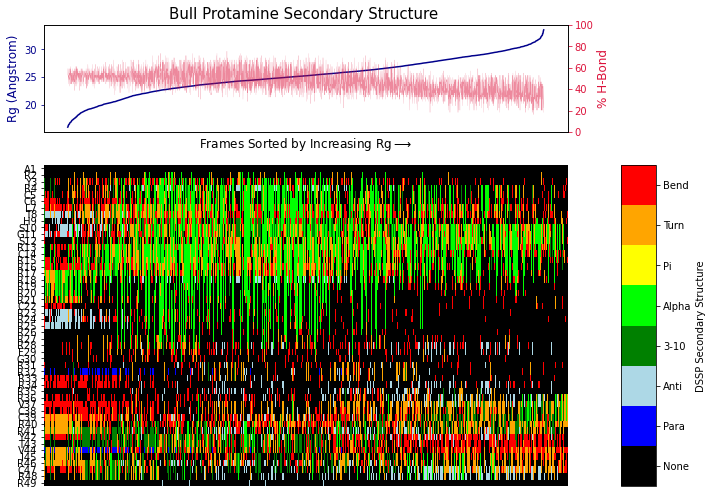

In [11]:
ss=ss_propensity(bull_secstruc)
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,7),
                     gridspec_kw={'width_ratios': [15, 1],
                                  'height_ratios':[1,3]})
bull_heatmap=bull_secstruc.copy().iloc[::100,:]
bull_heatmap['Rg']=bull_rg_ree.iloc[::100,:].Rg.values
bull_heatmap['total_ss']=ss.values[::100]
bull_heatmap=bull_heatmap.sort_values(by=['Rg'],ascending=True)
axs[0,0].plot(bull_heatmap.Rg.values, color='darkblue')
axs[0,0].set_ylabel('Rg (Angstrom)',color='darkblue',fontsize=12)
axs[0,0].tick_params(axis="y", colors="darkblue")
axs[0,0].tick_params(axis="x", bottom=False, labelbottom=False)
axs[0,0].set_xlabel('Frames Sorted by Increasing Rg'+ r'$\longrightarrow$',
                   fontsize=12)
axs[0,0].set_title('Bull Protamine Secondary Structure ',fontsize=15)
ax=axs[0,0].twinx()
ax.plot(bull_heatmap.total_ss.values*100,color='crimson',alpha=0.5,
        linewidth=0.2)
ax.set_ylabel('% H-Bond', color='crimson',fontsize=12)
ax.tick_params(axis="y", colors="crimson")
ax.set_ylim(0,100)
sequence='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
sequence=[sequence[i-1]+str(i) for i in range(1,len(sequence)+1)]
sns.heatmap(bull_heatmap.iloc[:,2:-2].T,ax=axs[1,0],
            xticklabels=False,yticklabels=True,
            cmap=ListedColormap(['black', 'blue','lightblue',
                                 'green','lime','yellow','orange','red']),
            cbar=False)
axs[1,0].set_yticklabels(sequence)
cmap = mpl.colors.ListedColormap(['black', 'blue','lightblue',
                                  'green','lime','yellow','orange','red'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [0, 1, 2, 3, 4, 5,6,7, 8.0]
ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = mpl.colorbar.ColorbarBase(axs[1,1], cmap=cmap,
                                norm=norm,
                                boundaries=bounds,
                                ticks=ticks,
                                spacing='proportional',
                                orientation='vertical')
cbar.set_ticklabels(['None','Para','Anti','3-10','Alpha','Pi','Turn','Bend'])
cbar.set_label('DSSP Secondary Structure')
axs[0,1].remove()
plt.tight_layout()

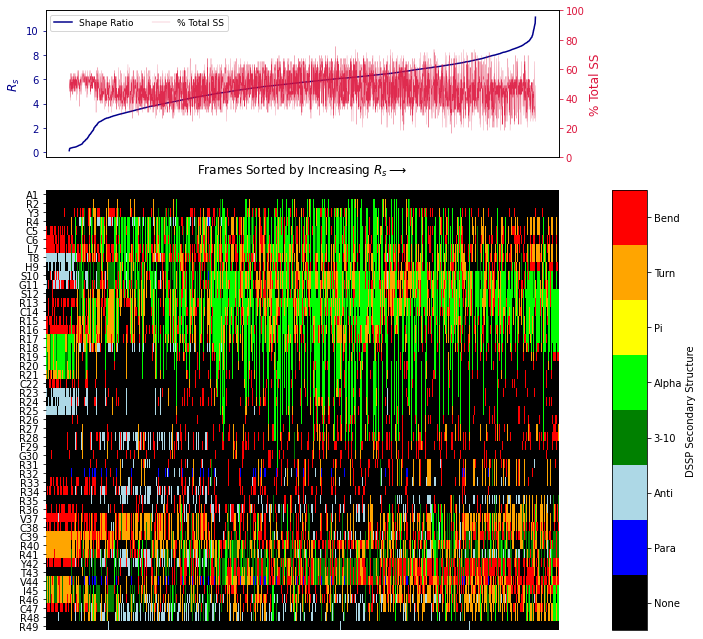

In [12]:
#IF YOU RUN THIS, bull_rg gets deleted. be careful
ss=ss_propensity(bull_secstruc)
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,9),
                     gridspec_kw={'width_ratios': [15, 1],
                                  'height_ratios':[1,3]})
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for bull
bull_rg = pd.read_csv("bull_Rg_master_out.csv")
bull_ree = pd.read_csv("bull_Ree_master_out.csv")
bull_rg_ree=pd.concat([bull_rg,bull_ree['Ree']],axis=1)
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=14]
bull_rg_ree=bull_rg_ree[bull_rg_ree.sim!=15]
blank_df = pd.DataFrame()
for sim in bull_rg_ree.sim.unique():
    temp_df = bull_rg_ree[bull_rg_ree.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
bull_rg_ree = blank_df.copy()
del blank_df
del temp_df
del bull_rg, bull_ree
bull_heatmap=bull_secstruc.copy()
bull_heatmap['Rg']=bull_rg_ree.Rg.values
bull_heatmap['Ree']=bull_rg_ree.Ree.values
bull_heatmap['ratio']=bull_heatmap.Ree.values**2/bull_heatmap.Rg.values**2
bull_heatmap=bull_heatmap.iloc[::100,:]
bull_heatmap['total_ss']=ss.values[::100]
bull_heatmap=bull_heatmap.sort_values(by=['ratio'],ascending=True)
ratio_line=axs[0,0].plot(bull_heatmap.ratio.values, color='darkblue',linewidth=1.5,label='Shape Ratio')
axs[0,0].set_ylabel(r'$R_{s}$',color='darkblue',fontsize=12)
axs[0,0].tick_params(axis="y", colors="darkblue")
axs[0,0].tick_params(axis="x", bottom=False, labelbottom=False)
axs[0,0].set_xlabel('Frames Sorted by Increasing '+r'$R_{s}$'+ r'$\longrightarrow$',
                   fontsize=12)
#axs[0,0].set_title('ff14SB All Sims Combined',
                  # fontsize=12)
#axs[0,0].set_title('Chum bull: All Simulations Combined',
#                   fontsize=15)    
ax=axs[0,0].twinx()
total_ss_line=ax.plot(bull_heatmap.total_ss.values*100,color='crimson',alpha=0.9,
                      linewidth=0.2,label='% Total SS')
ax.set_ylabel('% Total SS', color='crimson',fontsize=12)
ax.tick_params(axis="y", colors="crimson")
ax.set_ylim(0,100)
total_lines=ratio_line+total_ss_line
total_labs=[l.get_label() for l in total_lines]
ax.legend(total_lines,total_labs,fontsize=9,loc='upper left',ncol=2)
sequence='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
sequence=[sequence[i-1]+str(i) for i in range(1,len(sequence)+1)]
sns.heatmap(bull_heatmap.iloc[:,2:-4].T,ax=axs[1,0],
            xticklabels=False,yticklabels=True,
            cmap=ListedColormap(['black', 'blue','lightblue',
                                 'green','lime','yellow','orange','red']),
            cbar=False)
axs[1,0].set_yticklabels(sequence)
cmap = mpl.colors.ListedColormap(['black', 'blue','lightblue',
                                  'green','lime','yellow','orange','red'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [0, 1, 2, 3, 4, 5,6,7, 8.0]
ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = mpl.colorbar.ColorbarBase(axs[1,1], cmap=cmap,
                                norm=norm,
                                boundaries=bounds,
                                ticks=ticks,
                                spacing='proportional',
                                orientation='vertical')
cbar.set_ticklabels(['None','Para','Anti','3-10','Alpha','Pi','Turn','Bend'])
cbar.set_label('DSSP Secondary Structure')
axs[0,1].remove()
plt.tight_layout()


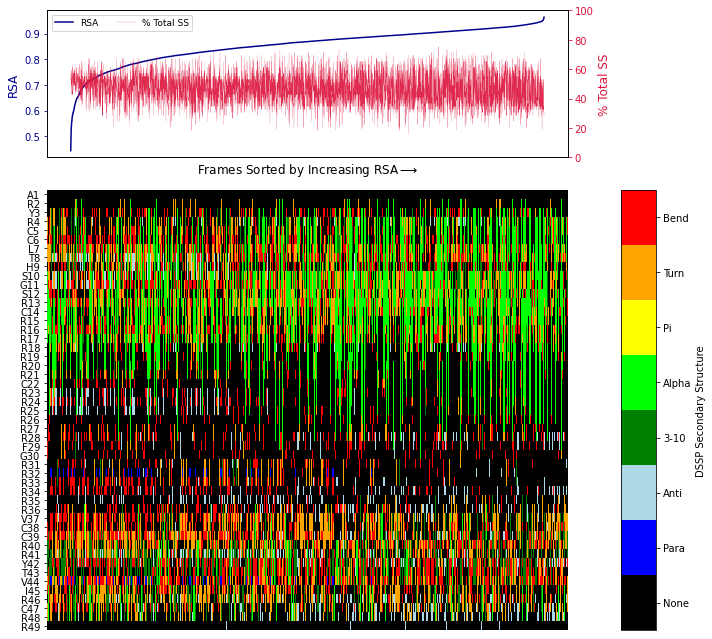

In [15]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,9),
                     gridspec_kw={'width_ratios': [15, 1],
                                  'height_ratios':[1,3]})
bull_tensor=pd.read_csv('bull_moments_equilibrated.csv')
bull_tensor['Rg_sqrd']=bull_tensor.R1.values+bull_tensor.R2.values+bull_tensor.R3.values
bull_tensor['asphericity']=bull_tensor.R1.values-(0.5*(bull_tensor.R2.values+bull_tensor.R3.values))
bull_tensor['acylindricity']=bull_tensor.R2.values-bull_tensor.R3.values
bull_tensor['RSA']=((bull_tensor.asphericity.values**2+(0.75*bull_tensor.acylindricity.values**2))/(bull_tensor.Rg_sqrd.values)**2)**0.5

bull_heatmap=bull_secstruc.copy()
bull_heatmap['RSA']=bull_tensor.RSA.values
bull_heatmap=bull_heatmap.iloc[::100,:]
bull_heatmap['total_ss']=ss.values[::100]
bull_heatmap=bull_heatmap.sort_values(by=['RSA'],ascending=True)
ratio_line=axs[0,0].plot(bull_heatmap.RSA.values, color='darkblue',linewidth=1.5,label='RSA')
axs[0,0].set_ylabel('RSA',color='darkblue',fontsize=12)
axs[0,0].tick_params(axis="y", colors="darkblue")
axs[0,0].tick_params(axis="x", bottom=False, labelbottom=False)
axs[0,0].set_xlabel('Frames Sorted by Increasing '+'RSA'+ r'$\longrightarrow$',
                   fontsize=12)
#axs[0,0].set_title('ff14SB All Sims Combined',
                  # fontsize=12)
#axs[0,0].set_title('Chum bull: All Simulations Combined',
#                   fontsize=15)    
ax=axs[0,0].twinx()
total_ss_line=ax.plot(bull_heatmap.total_ss.values*100,color='crimson',alpha=0.9,
                      linewidth=0.2,label='% Total SS')
ax.set_ylabel('% Total SS', color='crimson',fontsize=12)
ax.tick_params(axis="y", colors="crimson")
ax.set_ylim(0,100)
total_lines=ratio_line+total_ss_line
total_labs=[l.get_label() for l in total_lines]
ax.legend(total_lines,total_labs,fontsize=9,loc='upper left',ncol=2)
sequence='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
sequence=[sequence[i-1]+str(i) for i in range(1,len(sequence)+1)]
sns.heatmap(bull_heatmap.iloc[:,2:-2].T,ax=axs[1,0],
            xticklabels=False,yticklabels=True,
            cmap=ListedColormap(['black', 'blue','lightblue',
                                 'green','lime','yellow','orange','red']),
            cbar=False)
axs[1,0].set_yticklabels(sequence)
cmap = mpl.colors.ListedColormap(['black', 'blue','lightblue',
                                  'green','lime','yellow','orange','red'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [0, 1, 2, 3, 4, 5,6,7, 8.0]
ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = mpl.colorbar.ColorbarBase(axs[1,1], cmap=cmap,
                                norm=norm,
                                boundaries=bounds,
                                ticks=ticks,
                                spacing='proportional',
                                orientation='vertical')
cbar.set_ticklabels(['None','Para','Anti','3-10','Alpha','Pi','Turn','Bend'])
cbar.set_label('DSSP Secondary Structure')
axs[0,1].remove()
plt.tight_layout()


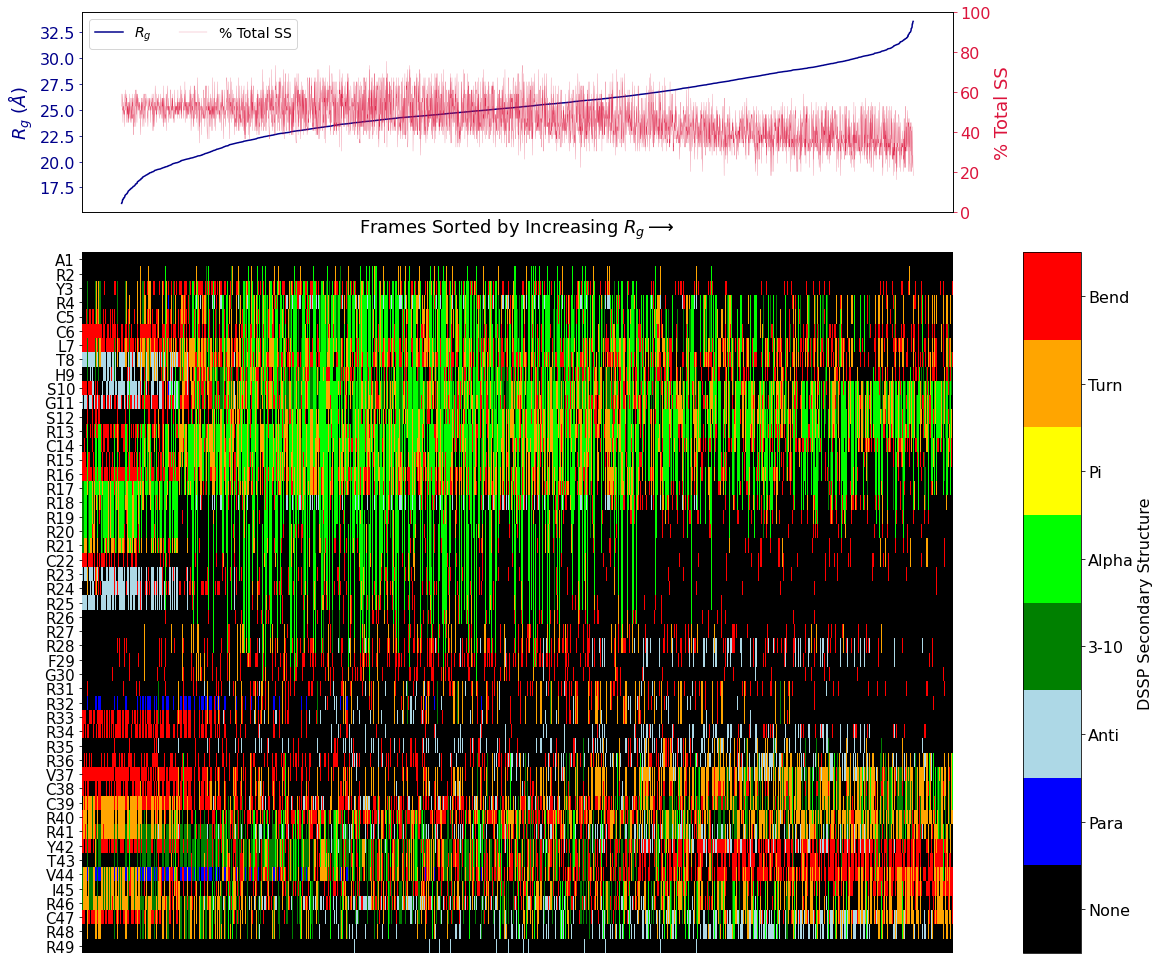

In [13]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(16,13.5),
                     gridspec_kw={'width_ratios': [15, 1],
                                  'height_ratios':[1,3.5]})
bull_heatmap=bull_secstruc.copy().iloc[::100,:]
bull_heatmap['Rg']=bull_rg_ree.iloc[::100,:].Rg.values
bull_heatmap['total_ss']=ss.values[::100]
bull_heatmap=bull_heatmap.sort_values(by=['Rg'],ascending=True)
rg_line=axs[0,0].plot(bull_heatmap.Rg.values, color='darkblue',linewidth=1.5,label=r'$R_{g}$')
axs[0,0].set_ylabel(r'$R_{g}$'+' ('+r'$\AA$'+')',color='darkblue',fontsize=18)
axs[0,0].tick_params(axis="y", colors="darkblue")
axs[0,0].tick_params(axis="x", bottom=False, labelbottom=False)
plt.setp(axs[0,0].get_yticklabels(), fontsize=16)
axs[0,0].set_xlabel('Frames Sorted by Increasing '+r'$R_{g}$'+ r'$\longrightarrow$',
                   fontsize=18)
#axs[0,0].set_title('Bull P1: All Simulations Combined',
#                   fontsize=20)
ax=axs[0,0].twinx()
total_ss_line=ax.plot(bull_heatmap.total_ss.values*100,color='crimson',alpha=0.9,
                      linewidth=0.2,label='% Total SS')
ax.set_ylabel('% Total SS', color='crimson',fontsize=18)
plt.setp(ax.get_yticklabels(), fontsize=16)
ax.tick_params(axis="y", colors="crimson")
ax.set_ylim(0,100)
total_lines=rg_line+total_ss_line
total_labs=[l.get_label() for l in total_lines]
ax.legend(total_lines,total_labs,fontsize=14,loc='upper left',ncol=2)
sequence='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
sequence=[sequence[i-1]+str(i) for i in range(1,len(sequence)+1)]
sns.heatmap(bull_heatmap.iloc[:,2:-2].T,ax=axs[1,0],
            xticklabels=False,yticklabels=True,
            cmap=ListedColormap(['black', 'blue','lightblue',
                                 'green','lime','yellow','orange','red']),
            cbar=False)
axs[1,0].set_yticklabels(sequence,fontsize=15)
cmap = mpl.colors.ListedColormap(['black', 'blue','lightblue',
                                  'green','lime','yellow','orange','red'])
cmap.set_over('0.25')
cmap.set_under('0.75')

bounds = [0, 1, 2, 3, 4, 5,6,7, 8]
ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cbar = mpl.colorbar.ColorbarBase(axs[1,1], cmap=cmap,
                                norm=norm,
                                boundaries=bounds,
                                ticks=ticks,
                                spacing='proportional',
                                orientation='vertical')
cbar.set_ticklabels(['None','Para','Anti','3-10','Alpha','Pi','Turn','Bend'])
cbar.set_label('DSSP Secondary Structure',size=16)
plt.setp(axs[1,1].get_yticklabels(), fontsize=16)
axs[0,1].remove()
plt.tight_layout()
#fig.savefig('figures_for_publication/bull_secstruc.png',dpi=400,bbox_inches='tight')

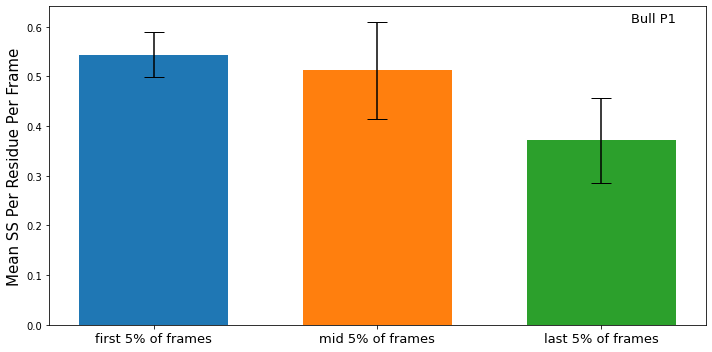

In [14]:
#check to see if middle of the bull sequence progressively losing total secondary structure
#check these values before messing with them
#MUST run code after bull_heatmap has been run. 
final_limit=int(len(bull_heatmap.index.values))
first_five_percent_limit=int(0.05*final_limit)
last_five_percent_limit=int(final_limit-(0.05*final_limit))
middle_five_percent_limit=int((final_limit*0.5)-(final_limit*0.5*0.05))
identify_columns_with_resid=[int(element) for index,element in enumerate(bull_heatmap.columns) if isinstance(element,str)==False]

first_five=bull_heatmap.iloc[0:(first_five_percent_limit+1),min(identify_columns_with_resid):(max(identify_columns_with_resid)+1)].ne(0).sum(axis=1)/(len(bull_heatmap.iloc[0:(first_five_percent_limit+1),min(identify_columns_with_resid):(max(identify_columns_with_resid)+1)].columns))
middle_five=bull_heatmap.iloc[middle_five_percent_limit:(middle_five_percent_limit+first_five_percent_limit+1),min(identify_columns_with_resid):(max(identify_columns_with_resid)+1)].ne(0).sum(axis=1)/(len(bull_heatmap.iloc[middle_five_percent_limit:(middle_five_percent_limit+first_five_percent_limit+1),min(identify_columns_with_resid):(max(identify_columns_with_resid)+1)].columns))
last_five=bull_heatmap.iloc[last_five_percent_limit:(final_limit+1),min(identify_columns_with_resid):(max(identify_columns_with_resid)+1)].ne(0).sum(axis=1)/(len(bull_heatmap.iloc[last_five_percent_limit:(final_limit+1),min(identify_columns_with_resid):(max(identify_columns_with_resid)+1)].columns))
labels=['first 5% of frames','mid 5% of frames','last 5% of frames']
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(0,first_five.mean(),width=0.2,yerr=first_five.std(),capsize=10)
ax.bar(0.3,middle_five.mean(),width=0.2,yerr=middle_five.std(),capsize=10)
ax.bar(0.6,last_five.mean(),width=0.2,yerr=last_five.std(),capsize=10)
ax.set_xticks([0,0.3,0.6])
ax.set_xticklabels(labels,fontsize=13)
ax.set_ylabel('Mean SS Per Residue Per Frame',fontsize=15)
#ax.set_ylim(0,1)
#ax.set_title('bull Secondary Structure',fontsize=23)
plt.text(.92,.95,'Bull P1',fontsize=13,
        horizontalalignment='center',
        transform=ax.transAxes)
fig.tight_layout()
plt.savefig('figures_for_publication/bull_secstruc_rescomparison.png',dpi=400,bbox_inches='tight')


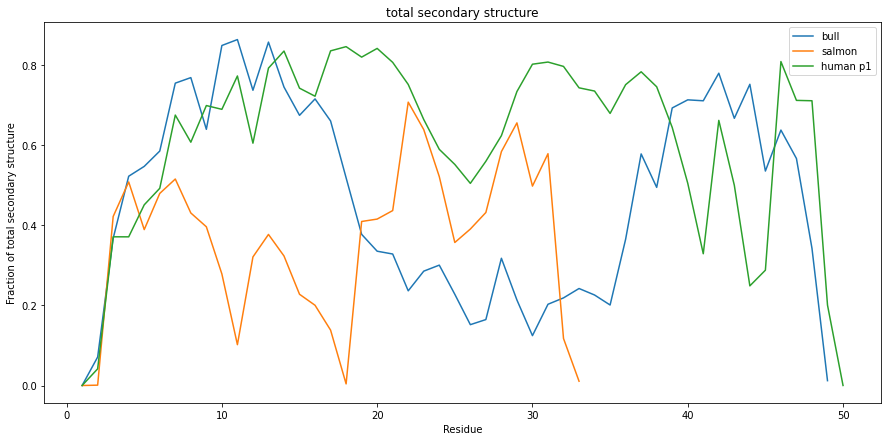

In [18]:
plt.subplots(figsize=(15,7))
plt.plot(ss_propensity_byres(bull_secstruc),label='bull')
plt.plot(ss_propensity_byres(salmon_secstruc),label='salmon')
plt.plot(ss_propensity_byres(p1_secstruc),label='human p1')
plt.title('total secondary structure')
plt.xlabel('Residue')
plt.ylabel('Fraction of total secondary structure')
plt.legend()

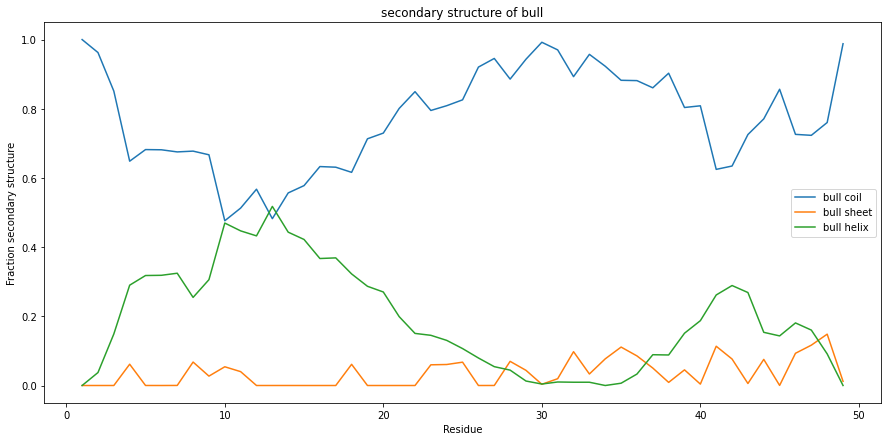

In [19]:
plt.subplots(figsize=(15,7))
plt.plot(calculate_coil_byres(bull_secstruc),label='bull coil')
plt.plot(calculate_sheet_byres(bull_secstruc),label='bull sheet')
plt.plot(calculate_helicity_byres(bull_secstruc),label='bull helix')
plt.title('secondary structure of bull')
plt.xlabel('Residue')
plt.ylabel('Fraction secondary structure')
plt.legend()

In [15]:
bull_helix_byframebyres=(bull_secstruc.iloc[:,2:].eq(3).sum(axis=0).sum()+bull_secstruc.iloc[:,2:].eq(4).sum(axis=0).sum()+bull_secstruc.iloc[:,2:].eq(5).sum(axis=0).sum())/(bull_secstruc.iloc[:,2:].shape[0]*bull_secstruc.iloc[:,2:].shape[1])
p1_helix_byframebyres=(p1_secstruc.iloc[:,2:].eq(3).sum(axis=0).sum()+p1_secstruc.iloc[:,2:].eq(4).sum(axis=0).sum()+p1_secstruc.iloc[:,2:].eq(5).sum(axis=0).sum())/(p1_secstruc.iloc[:,2:].shape[0]*p1_secstruc.iloc[:,2:].shape[1])
salmon_helix_byframebyres=(salmon_secstruc.iloc[:,2:].eq(3).sum(axis=0).sum()+salmon_secstruc.iloc[:,2:].eq(4).sum(axis=0).sum()+salmon_secstruc.iloc[:,2:].eq(5).sum(axis=0).sum())/(salmon_secstruc.iloc[:,2:].shape[0]*salmon_secstruc.iloc[:,2:].shape[1])
bull_sheet_byframebyres=(bull_secstruc.iloc[:,2:].eq(1).sum(axis=0).sum()+bull_secstruc.iloc[:,2:].eq(2).sum(axis=0).sum())/(bull_secstruc.iloc[:,2:].shape[0]*bull_secstruc.iloc[:,2:].shape[1])
p1_sheet_byframebyres=(p1_secstruc.iloc[:,2:].eq(1).sum(axis=0).sum()+p1_secstruc.iloc[:,2:].eq(2).sum(axis=0).sum())/(p1_secstruc.iloc[:,2:].shape[0]*p1_secstruc.iloc[:,2:].shape[1])
salmon_sheet_byframebyres=(salmon_secstruc.iloc[:,2:].eq(1).sum(axis=0).sum()+salmon_secstruc.iloc[:,2:].eq(2).sum(axis=0).sum())/(salmon_secstruc.iloc[:,2:].shape[0]*salmon_secstruc.iloc[:,2:].shape[1])
bull_coil_byframebyres=(bull_secstruc.iloc[:,2:].eq(6).sum(axis=0).sum()+bull_secstruc.iloc[:,2:].eq(7).sum(axis=0).sum())/(bull_secstruc.iloc[:,2:].shape[0]*bull_secstruc.iloc[:,2:].shape[1])
p1_coil_byframebyres=(p1_secstruc.iloc[:,2:].eq(6).sum(axis=0).sum()+p1_secstruc.iloc[:,2:].eq(7).sum(axis=0).sum())/(p1_secstruc.iloc[:,2:].shape[0]*p1_secstruc.iloc[:,2:].shape[1])
salmon_coil_byframebyres=(salmon_secstruc.iloc[:,2:].eq(6).sum(axis=0).sum()+salmon_secstruc.iloc[:,2:].eq(7).sum(axis=0).sum())/(salmon_secstruc.iloc[:,2:].shape[0]*salmon_secstruc.iloc[:,2:].shape[1])

In [13]:
salmon_coil_byframebyres_bysim=np.array([])
salmon_helix_byframebyres_bysim=np.array([])
salmon_sheet_byframebyres_bysim=np.array([])
bull_coil_byframebyres_bysim=np.array([])
bull_helix_byframebyres_bysim=np.array([])
bull_sheet_byframebyres_bysim=np.array([])
p1_coil_byframebyres_bysim=np.array([])
p1_helix_byframebyres_bysim=np.array([])
p1_sheet_byframebyres_bysim=np.array([])
identify_columns_with_resid_bull=[int(index) for index,
                             element in enumerate(bull_secstruc.columns) if isinstance(element,str)==False]
identify_columns_with_resid_salmon=[int(index) for index,
                             element in enumerate(salmon_secstruc.columns) if isinstance(element,str)==False]
identify_columns_with_resid_p1=[int(index) for index,
                             element in enumerate(p1_secstruc.columns) if isinstance(element,str)==False]
if min(identify_columns_with_resid_bull)!=min(identify_columns_with_resid_salmon) or min(identify_columns_with_resid_salmon)!=min(identify_columns_with_resid_p1) or min(identify_columns_with_resid_p1)!=min(identify_columns_with_resid_bull):
    print('Error!')
else:
    identify_columns_with_resid_minimum=min(identify_columns_with_resid_bull)

salmon_coil_byframebyres_bysim=(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(6).sum(axis=1)+salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(7).sum(axis=1)+salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(0).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
salmon_helix_byframebyres_bysim=(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(3).sum(axis=1)+salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(4).sum(axis=1)+salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(5).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
salmon_sheet_byframebyres_bysim=(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(1).sum(axis=1)+salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(2).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])

bull_coil_byframebyres_bysim=(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(6).sum(axis=1)+bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(7).sum(axis=1)+bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(0).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
bull_helix_byframebyres_bysim=(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(3).sum(axis=1)+bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(4).sum(axis=1)+bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(5).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
bull_sheet_byframebyres_bysim=(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(1).sum(axis=1)+bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(2).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])

p1_coil_byframebyres_bysim=(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(6).sum(axis=1)+p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(7).sum(axis=1)+p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(0).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
p1_helix_byframebyres_bysim=(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(3).sum(axis=1)+p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(4).sum(axis=1)+p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(5).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
p1_sheet_byframebyres_bysim=(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(1).sum(axis=1)+p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].eq(2).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])


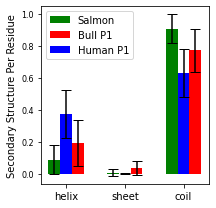

In [14]:
#from matplotlib documentation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels=['helix','sheet','coil']
salmon_byframebyres_bysim=[salmon_helix_byframebyres_bysim.mean(),salmon_sheet_byframebyres_bysim.mean(),salmon_coil_byframebyres_bysim.mean()]
p1_byframebyres_bysim=[p1_helix_byframebyres_bysim.mean(),p1_sheet_byframebyres_bysim.mean(),p1_coil_byframebyres_bysim.mean()]
bull_byframebyres_bysim=[bull_helix_byframebyres_bysim.mean(),bull_sheet_byframebyres_bysim.mean(),bull_coil_byframebyres_bysim.mean()]
salmon_byframebyres_bysim_error=np.array([salmon_helix_byframebyres_bysim.std(),salmon_sheet_byframebyres_bysim.std(),salmon_coil_byframebyres_bysim.std()])
p1_byframebyres_bysim_error=np.array([p1_helix_byframebyres_bysim.std(),p1_sheet_byframebyres_bysim.std(),p1_coil_byframebyres_bysim.std()])
bull_byframebyres_bysim_error=np.array([bull_helix_byframebyres_bysim.std(),bull_sheet_byframebyres_bysim.std(),bull_coil_byframebyres_bysim.std()])
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(3.1,3.0))
rects1 = ax.bar(x- width, salmon_byframebyres_bysim, width,yerr=salmon_byframebyres_bysim_error, label='Salmon',capsize=5,color='green')
rects3 = ax.bar(x + width, bull_byframebyres_bysim, width,yerr=bull_byframebyres_bysim_error, label='Bull P1',capsize=5,color='red')
#rects1_err=ax.errorbar(x- width, salmon_byframebyres_bysim, yerr=salmon_byframebyres_bysim_error,lolims=True, capsize = 0,ls='None')
rects2 = ax.bar(x , p1_byframebyres_bysim, width,yerr=p1_byframebyres_bysim_error, label='Human P1',capsize=5,color='blue')
#rects2_err=ax.errorbar(x, p1_byframebyres_bysim, yerr=p1_byframebyres_bysim_error,lolims=True, capsize = 0,ls='None')

#rects3_err=ax.errorbar(x+ width, bull_byframebyres_bysim, yerr=bull_byframebyres_bysim_error,lolims=True, capsize = 0,ls='None')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Secondary Structure Per Residue',fontsize=10)
#ax.set_title('Secondary Structure',fontsize=23)
ax.set_xticks(x)
#ax.set_ylim(0,1.1)
ax.set_xticklabels(labels,fontsize=10)
plt.yticks(fontsize=8)
ax.legend(fontsize=10)
fig.tight_layout()
#fig.savefig('figures_for_publication/all_secstruc.png',dpi=400,bbox_inches='tight')


In [42]:
bull_sequence='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
salmon_sequence='MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'
p1_sequence='ARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH'
#counting arginines
salmon_arg_position=[]
p1_arg_position=[]
bull_arg_position=[]
for index,res in enumerate(salmon_sequence):
    if res=='R':
        salmon_arg_position.append(index+1)
for index,res in enumerate(bull_sequence):
    if res=='R':
        bull_arg_position.append(index+1)
for index,res in enumerate(p1_sequence):
    if res=='R':
        p1_arg_position.append(index+1)

In [81]:
salmon_coil_byframebyres_bysim_arg=np.array([])
salmon_helix_byframebyres_bysim_arg=np.array([])
salmon_sheet_byframebyres_bysim_arg=np.array([])
bull_coil_byframebyres_bysim_arg=np.array([])
bull_helix_byframebyres_bysim_arg=np.array([])
bull_sheet_byframebyres_bysim_arg=np.array([])
p1_coil_byframebyres_bysim_arg=np.array([])
p1_helix_byframebyres_bysim_arg=np.array([])
p1_sheet_byframebyres_bysim_arg=np.array([])
identify_arg_columns_with_resid_bull=[int(index) for index,
                             element in enumerate(bull_secstruc.columns) if element in bull_arg_position]
identify_arg_columns_with_resid_salmon=[int(index) for index,
                             element in enumerate(salmon_secstruc.columns) if element in salmon_arg_position]
identify_arg_columns_with_resid_p1=[int(index) for index,
                             element in enumerate(p1_secstruc.columns) if element in p1_arg_position]



salmon_coil_byframebyres_bysim_arg=(salmon_secstruc.iloc[:,identify_arg_columns_with_resid_salmon].eq(6).sum(axis=1)+salmon_secstruc.iloc[:,identify_arg_columns_with_resid_salmon].eq(7).sum(axis=1)+salmon_secstruc.iloc[:,identify_arg_columns_with_resid_salmon].eq(0).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
salmon_helix_byframebyres_bysim_arg=(salmon_secstruc.iloc[:,identify_arg_columns_with_resid_salmon].eq(3).sum(axis=1)+salmon_secstruc.iloc[:,identify_arg_columns_with_resid_salmon].eq(4).sum(axis=1)+salmon_secstruc.iloc[:,identify_arg_columns_with_resid_salmon].eq(5).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
salmon_sheet_byframebyres_bysim_arg=(salmon_secstruc.iloc[:,identify_arg_columns_with_resid_salmon].eq(1).sum(axis=1)+salmon_secstruc.iloc[:,identify_arg_columns_with_resid_salmon].eq(2).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])

bull_coil_byframebyres_bysim_arg=(bull_secstruc.iloc[:,identify_arg_columns_with_resid_bull].eq(6).sum(axis=1)+bull_secstruc.iloc[:,identify_arg_columns_with_resid_bull].eq(7).sum(axis=1)+bull_secstruc.iloc[:,identify_arg_columns_with_resid_bull].eq(0).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
bull_helix_byframebyres_bysim_arg=(bull_secstruc.iloc[:,identify_arg_columns_with_resid_bull].eq(3).sum(axis=1)+bull_secstruc.iloc[:,identify_arg_columns_with_resid_bull].eq(4).sum(axis=1)+bull_secstruc.iloc[:,identify_arg_columns_with_resid_bull].eq(5).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
bull_sheet_byframebyres_bysim_arg=(bull_secstruc.iloc[:,identify_arg_columns_with_resid_bull].eq(1).sum(axis=1)+bull_secstruc.iloc[:,identify_arg_columns_with_resid_bull].eq(2).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])

p1_coil_byframebyres_bysim_arg=(p1_secstruc.iloc[:,identify_arg_columns_with_resid_p1].eq(6).sum(axis=1)+p1_secstruc.iloc[:,identify_arg_columns_with_resid_p1].eq(7).sum(axis=1)+p1_secstruc.iloc[:,identify_arg_columns_with_resid_p1].eq(0).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
p1_helix_byframebyres_bysim_arg=(p1_secstruc.iloc[:,identify_arg_columns_with_resid_p1].eq(3).sum(axis=1)+p1_secstruc.iloc[:,identify_arg_columns_with_resid_p1].eq(4).sum(axis=1)+p1_secstruc.iloc[:,identify_arg_columns_with_resid_p1].eq(5).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
p1_sheet_byframebyres_bysim_arg=(p1_secstruc.iloc[:,identify_arg_columns_with_resid_p1].eq(1).sum(axis=1)+p1_secstruc.iloc[:,identify_arg_columns_with_resid_p1].eq(2).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])


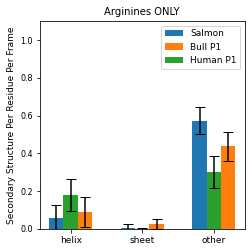

In [82]:
#from matplotlib documentation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels=['helix','sheet','other']
salmon_byframebyres_bysim_arg=[salmon_helix_byframebyres_bysim_arg.mean(),salmon_sheet_byframebyres_bysim_arg.mean(),salmon_coil_byframebyres_bysim_arg.mean()]
p1_byframebyres_bysim_arg=[p1_helix_byframebyres_bysim_arg.mean(),p1_sheet_byframebyres_bysim_arg.mean(),p1_coil_byframebyres_bysim_arg.mean()]
bull_byframebyres_bysim_arg=[bull_helix_byframebyres_bysim_arg.mean(),bull_sheet_byframebyres_bysim_arg.mean(),bull_coil_byframebyres_bysim_arg.mean()]
salmon_byframebyres_bysim_arg_error=np.array([salmon_helix_byframebyres_bysim_arg.std(),salmon_sheet_byframebyres_bysim_arg.std(),salmon_coil_byframebyres_bysim_arg.std()])
p1_byframebyres_bysim_arg_error=np.array([p1_helix_byframebyres_bysim_arg.std(),p1_sheet_byframebyres_bysim_arg.std(),p1_coil_byframebyres_bysim_arg.std()])
bull_byframebyres_bysim_arg_error=np.array([bull_helix_byframebyres_bysim_arg.std(),bull_sheet_byframebyres_bysim_arg.std(),bull_coil_byframebyres_bysim_arg.std()])
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(3.6,3.6))
rects1 = ax.bar(x- width, salmon_byframebyres_bysim_arg, width,yerr=salmon_byframebyres_bysim_arg_error, label='Salmon',capsize=5)
rects3 = ax.bar(x + width, bull_byframebyres_bysim_arg, width,yerr=bull_byframebyres_bysim_arg_error, label='Bull P1',capsize=5)
#rects1_err=ax.errorbar(x- width, salmon_byframebyres_bysim_arg, yerr=salmon_byframebyres_bysim_arg_error,lolims=True, capsize = 0,ls='None')
rects2 = ax.bar(x , p1_byframebyres_bysim_arg, width,yerr=p1_byframebyres_bysim_arg_error, label='Human P1',capsize=5)
#rects2_err=ax.errorbar(x, p1_byframebyres_bysim_arg, yerr=p1_byframebyres_bysim_arg_error,lolims=True, capsize = 0,ls='None')

#rects3_err=ax.errorbar(x+ width, bull_byframebyres_bysim_arg, yerr=bull_byframebyres_bysim_arg_error,lolims=True, capsize = 0,ls='None')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Secondary Structure Per Residue Per Frame',fontsize=9)
ax.set_title('Arginines ONLY',fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=9)
plt.yticks(fontsize=8)
ax.legend(fontsize=9)
ax.set_ylim(0,1.1)
fig.tight_layout()
#fig.savefig('figures_for_publication/all_secstruc_arg.png',dpi=400,bbox_inches='tight')


In [75]:
print(salmon_byframebyres_bysim,'\n',salmon_byframebyres_bysim_arg,'\n',salmon_byframebyres_bysim_nonarg)

[0.0866201048951049, 0.00731812354312354, 0.9060617715617715] 
 [0.08902188644688645, 0.01078131868131868, 0.900196794871795] 
 [0.08712664835164835, 0.006572390109890107, 0.7964108516483516]


In [83]:
salmon_coil_byframebyres_bysim_nonarg=np.array([])
salmon_helix_byframebyres_bysim_nonarg=np.array([])
salmon_sheet_byframebyres_bysim_nonarg=np.array([])
bull_coil_byframebyres_bysim_nonarg=np.array([])
bull_helix_byframebyres_bysim_nonarg=np.array([])
bull_sheet_byframebyres_bysim_nonarg=np.array([])
p1_coil_byframebyres_bysim_nonarg=np.array([])
p1_helix_byframebyres_bysim_nonarg=np.array([])
p1_sheet_byframebyres_bysim_nonarg=np.array([])
identify_nonarg_columns_with_resid_bull=[int(index) for index,
                             element in enumerate(bull_secstruc.columns) if element not in bull_arg_position]
identify_nonarg_columns_with_resid_salmon=[int(index) for index,
                             element in enumerate(salmon_secstruc.columns) if element not in salmon_arg_position]
identify_nonarg_columns_with_resid_p1=[int(index) for index,
                             element in enumerate(p1_secstruc.columns) if element not in p1_arg_position]



salmon_coil_byframebyres_bysim_nonarg=(salmon_secstruc.iloc[:,identify_nonarg_columns_with_resid_salmon].eq(6).sum(axis=1)+salmon_secstruc.iloc[:,identify_nonarg_columns_with_resid_salmon].eq(7).sum(axis=1)+salmon_secstruc.iloc[:,identify_nonarg_columns_with_resid_salmon].eq(0).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
salmon_helix_byframebyres_bysim_nonarg=(salmon_secstruc.iloc[:,identify_nonarg_columns_with_resid_salmon].eq(3).sum(axis=1)+salmon_secstruc.iloc[:,identify_nonarg_columns_with_resid_salmon].eq(4).sum(axis=1)+salmon_secstruc.iloc[:,identify_nonarg_columns_with_resid_salmon].eq(5).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
salmon_sheet_byframebyres_bysim_nonarg=(salmon_secstruc.iloc[:,identify_nonarg_columns_with_resid_salmon].eq(1).sum(axis=1)+salmon_secstruc.iloc[:,identify_nonarg_columns_with_resid_salmon].eq(2).sum(axis=1))/(salmon_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])

bull_coil_byframebyres_bysim_nonarg=(bull_secstruc.iloc[:,identify_nonarg_columns_with_resid_bull].eq(6).sum(axis=1)+bull_secstruc.iloc[:,identify_nonarg_columns_with_resid_bull].eq(7).sum(axis=1)+bull_secstruc.iloc[:,identify_nonarg_columns_with_resid_bull].eq(0).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
bull_helix_byframebyres_bysim_nonarg=(bull_secstruc.iloc[:,identify_nonarg_columns_with_resid_bull].eq(3).sum(axis=1)+bull_secstruc.iloc[:,identify_nonarg_columns_with_resid_bull].eq(4).sum(axis=1)+bull_secstruc.iloc[:,identify_nonarg_columns_with_resid_bull].eq(5).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
bull_sheet_byframebyres_bysim_nonarg=(bull_secstruc.iloc[:,identify_nonarg_columns_with_resid_bull].eq(1).sum(axis=1)+bull_secstruc.iloc[:,identify_nonarg_columns_with_resid_bull].eq(2).sum(axis=1))/(bull_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])

p1_coil_byframebyres_bysim_nonarg=(p1_secstruc.iloc[:,identify_nonarg_columns_with_resid_p1].eq(6).sum(axis=1)+p1_secstruc.iloc[:,identify_nonarg_columns_with_resid_p1].eq(7).sum(axis=1)+p1_secstruc.iloc[:,identify_nonarg_columns_with_resid_p1].eq(0).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
p1_helix_byframebyres_bysim_nonarg=(p1_secstruc.iloc[:,identify_nonarg_columns_with_resid_p1].eq(3).sum(axis=1)+p1_secstruc.iloc[:,identify_nonarg_columns_with_resid_p1].eq(4).sum(axis=1)+p1_secstruc.iloc[:,identify_nonarg_columns_with_resid_p1].eq(5).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])
p1_sheet_byframebyres_bysim_nonarg=(p1_secstruc.iloc[:,identify_nonarg_columns_with_resid_p1].eq(1).sum(axis=1)+p1_secstruc.iloc[:,identify_nonarg_columns_with_resid_p1].eq(2).sum(axis=1))/(p1_secstruc.iloc[:,identify_columns_with_resid_minimum:].shape[1])


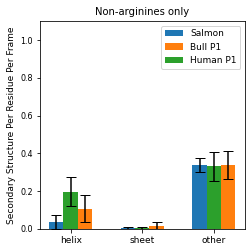

In [84]:
#from matplotlib documentation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels=['helix','sheet','other']
salmon_byframebyres_bysim_nonarg=[salmon_helix_byframebyres_bysim_nonarg.mean(),salmon_sheet_byframebyres_bysim_nonarg.mean(),salmon_coil_byframebyres_bysim_nonarg.mean()]
p1_byframebyres_bysim_nonarg=[p1_helix_byframebyres_bysim_nonarg.mean(),p1_sheet_byframebyres_bysim_nonarg.mean(),p1_coil_byframebyres_bysim_nonarg.mean()]
bull_byframebyres_bysim_nonarg=[bull_helix_byframebyres_bysim_nonarg.mean(),bull_sheet_byframebyres_bysim_nonarg.mean(),bull_coil_byframebyres_bysim_nonarg.mean()]
salmon_byframebyres_bysim_nonarg_error=np.array([salmon_helix_byframebyres_bysim_nonarg.std(),salmon_sheet_byframebyres_bysim_nonarg.std(),salmon_coil_byframebyres_bysim_nonarg.std()])
p1_byframebyres_bysim_nonarg_error=np.array([p1_helix_byframebyres_bysim_nonarg.std(),p1_sheet_byframebyres_bysim_nonarg.std(),p1_coil_byframebyres_bysim_nonarg.std()])
bull_byframebyres_bysim_nonarg_error=np.array([bull_helix_byframebyres_bysim_nonarg.std(),bull_sheet_byframebyres_bysim_nonarg.std(),bull_coil_byframebyres_bysim_nonarg.std()])
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(3.6,3.6))
rects1 = ax.bar(x- width, salmon_byframebyres_bysim_nonarg, width,yerr=salmon_byframebyres_bysim_nonarg_error, label='Salmon',capsize=5)
rects3 = ax.bar(x + width, bull_byframebyres_bysim_nonarg, width,yerr=bull_byframebyres_bysim_nonarg_error, label='Bull P1',capsize=5)
#rects1_err=ax.errorbar(x- width, salmon_byframebyres_bysim_nonarg, yerr=salmon_byframebyres_bysim_nonarg_error,lolims=True, capsize = 0,ls='None')
rects2 = ax.bar(x , p1_byframebyres_bysim_nonarg, width,yerr=p1_byframebyres_bysim_nonarg_error, label='Human P1',capsize=5)
#rects2_err=ax.errorbar(x, p1_byframebyres_bysim_nonarg, yerr=p1_byframebyres_bysim_nonarg_error,lolims=True, capsize = 0,ls='None')

#rects3_err=ax.errorbar(x+ width, bull_byframebyres_bysim_nonarg, yerr=bull_byframebyres_bysim_nonarg_error,lolims=True, capsize = 0,ls='None')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Secondary Structure Per Residue Per Frame',fontsize=9)
ax.set_title('Non-arginines only',fontsize=10)
ax.set_xticks(x)
ax.set_ylim(0,1.1)
ax.set_xticklabels(labels,fontsize=9)
plt.yticks(fontsize=8)
ax.legend(fontsize=9)
fig.tight_layout()
#fig.savefig('figures_for_publication/all_secstruc_nonarg.png',dpi=400,bbox_inches='tight')


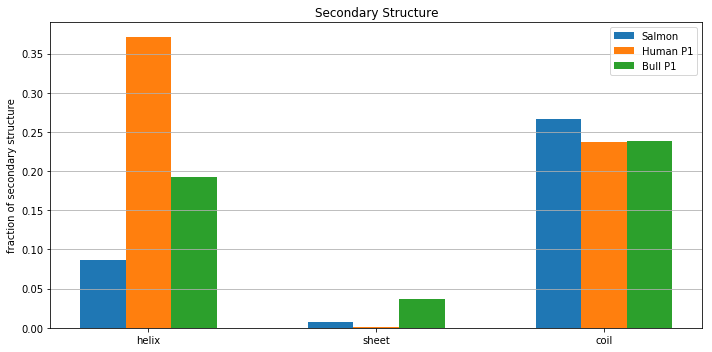

In [18]:
#from matplotlib documentation: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels=['helix','sheet','coil']
salmon_byframebyres=[salmon_helix_byframebyres,salmon_sheet_byframebyres,salmon_coil_byframebyres]
p1_byframebyres=[p1_helix_byframebyres,p1_sheet_byframebyres,p1_coil_byframebyres]
bull_byframebyres=[bull_helix_byframebyres,bull_sheet_byframebyres,bull_coil_byframebyres]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x- width, salmon_byframebyres, width, label='Salmon')
rects2 = ax.bar(x , p1_byframebyres, width, label='Human P1')
rects3 = ax.bar(x + width, bull_byframebyres, width, label='Bull P1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fraction of secondary structure')
ax.set_title('Secondary Structure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.yaxis.grid(True)
fig.tight_layout()

In [19]:
salmon_byframebyres_bysim_error=[salmon_helix_byframebyres_bysim.std(),salmon_sheet_byframebyres_bysim.std(),salmon_coil_byframebyres_bysim.std()]
p1_byframebyres_bysim_error=[p1_helix_byframebyres_bysim.std(),p1_sheet_byframebyres_bysim.std(),p1_coil_byframebyres_bysim.std()]
bull_byframebyres_bysim_error=[bull_helix_byframebyres_bysim.std(),bull_sheet_byframebyres_bysim.std(),bull_coil_byframebyres_bysim.std()]